# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [9]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms to use
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve
)

from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

##Loading Data

In [10]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Loading the dataset
cust = pd.read_csv("/content/drive/MyDrive/MIT DSML Files/Week5 - Classification and Hypothesis testing/Project- ed tech industry/ExtraaLearn.csv")



## Data Overview

- Observations
- Sanity checks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
# Checking the number of rows and columns in the data
cust.shape

(4612, 15)

In [13]:
# Let's create a copy of the data
data = cust.copy()

In [15]:
# Let's view the first 5 rows of the data
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [16]:
# Let's view the last 5 rows of the data
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [17]:
# Checking the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

###**Observations:**


*   There are 4612 observations and 15 columns in the dataset.
*   All the columns have 4612 non-null values, i.e., there are no missing values in the data.
*   10 columns are object type , remaining all columns are numerical






## **Checking for Unique values and Duplicate Values**

In [18]:
# Checking unique values in each column
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [19]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

### **Univariate analysis of numerical columns**

In [20]:
# Let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


### **Observations:**
1. The average **age** is 51 and ranges between 18 and 63
2. On average 3 Website visits are observed
3. A lead spends on average 376 seconds with max upto 2537 seconds
4. Pages view per visit averages at 2.79 pages while ranges between 2.07 to *18.43*


### **Univariate analysis for categorical variables**

In [21]:
data.describe(include=["object"]).T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


In [22]:
# Printing the % sub categories of each category

for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts(normalize=True))
    print("-" * 50)

Unique values in ID are :
ID
EXT001     0.000217
EXT2884    0.000217
EXT3080    0.000217
EXT3079    0.000217
EXT3078    0.000217
             ...   
EXT1537    0.000217
EXT1536    0.000217
EXT1535    0.000217
EXT1534    0.000217
EXT4612    0.000217
Name: proportion, Length: 4612, dtype: float64
--------------------------------------------------
Unique values in current_occupation are :
current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
Unique values in first_interaction are :
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
Unique values in profile_completed are :
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
Unique values in last_activity are :
last_ac

### **Observations:**
1.  **ID** is a unique lead identifier and can be dropped as it wouldnt add any information to our analysis
2.  56% of the leads are working as professional in their **current occupation** and students are only 12%
3.  Most **first interactions** were made by website almost 55%
4.  Almost 97% of the leads have **profile created** by 50% or more
5.  **Email activity** is almost doubled compared to phone and website
6.  10.7 % of total leads have seen the ad in **Newspaper**
7.  5% of total leads have seen the ad in **Magazine**
8.  11.4% of total leads have seen the ad on **digital media**
9. 15.2% of total leads have seen the ad on **educational channels**
10. Only 2% of the total leads have come from **referrals**

## **Data Preprocessing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Dropping ID column and Encoding variables with Yes and No values with 0 and 1**

In [23]:
# ID consists of uniques ID for clients and hence will not add value to the modeling

data.drop(["ID"], axis=1, inplace=True)

In [24]:
## Encoding No and Yes Values for print_media_type1 values to 0 and 1 respectively, for analysis.

data["print_media_type1"].replace("No", 0, inplace=True)
data["print_media_type1"].replace("Yes", 1, inplace=True)

In [25]:
## Encoding No and Yes Values for print_media_type2 values to 0 and 1 respectively, for analysis.

data["print_media_type2"].replace("No", 0, inplace=True)
data["print_media_type2"].replace("Yes", 1, inplace=True)

In [26]:
## Encoding No and Yes Values for digital_media values to 0 and 1 respectively, for analysis.

data["digital_media"].replace("No", 0, inplace=True)
data["digital_media"].replace("Yes", 1, inplace=True)

In [27]:
## Encoding No and Yes Values for educational_channels values to 0 and 1 respectively, for analysis.

data["educational_channels"].replace("No", 0, inplace=True)
data["educational_channels"].replace("Yes", 1, inplace=True)

In [28]:
## Encoding No and Yes Values for referral values to 0 and 1 respectively, for analysis.

data["referral"].replace("No", 0, inplace=True)
data["referral"].replace("Yes", 1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### **Univariate Analysis**



####**Customer Age**



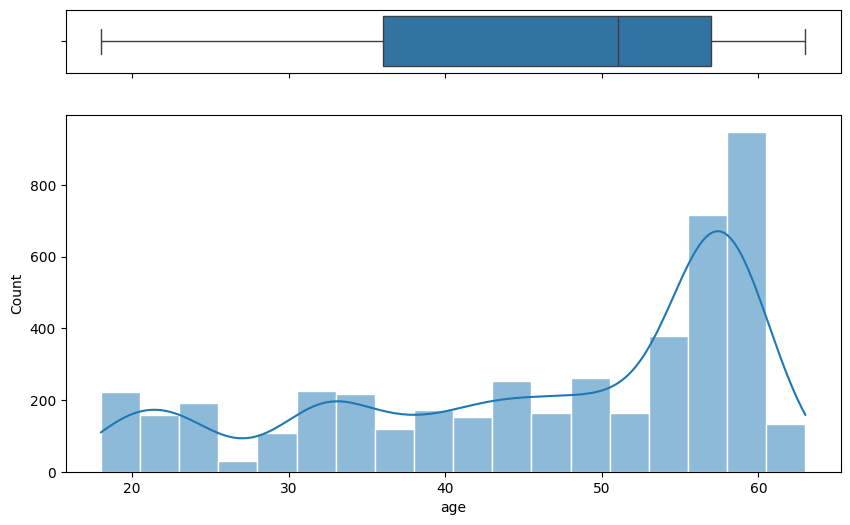

In [29]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.set_style("darkgrid")

# Add a graph in each part
sns.boxplot(data=data, x="age", ax=ax_box)
sns.histplot(data=data, x="age", kde=True, ax=ax_hist)
ax_box.set(xlabel='age')

plt.show()

### **Observations:**

1. It is a left-skewed distribution with median at 52  
2. Majority of the leads have age ranging from 55- 60 which explains the current occupation as professionals.



#### **Website Visits**



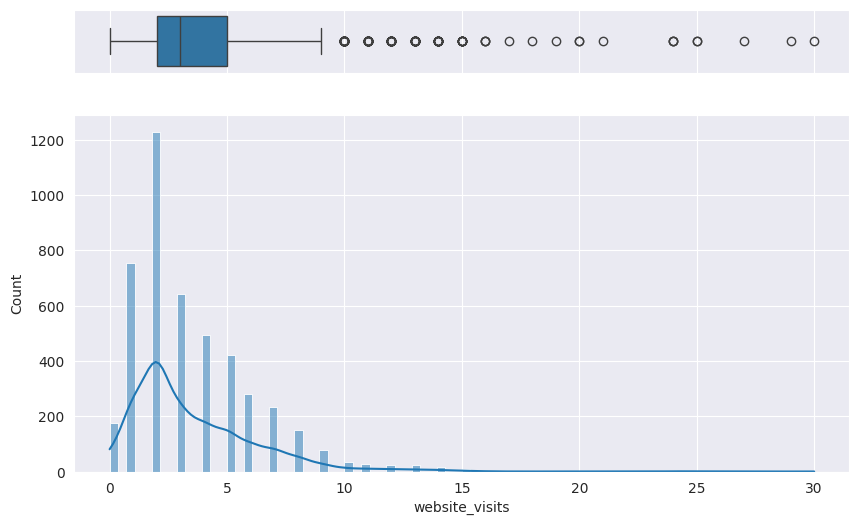

In [30]:
# @title
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.set_style("darkgrid")

# Add a graph in each part
sns.boxplot(data=data, x="website_visits", ax=ax_box)
sns.histplot(data=data, x="website_visits", kde=True, ax=ax_hist)
ax_box.set(xlabel='website_visits')

plt.show()

### **Observations:**


1.   The data is right skewed with median at 3 website visists
2.   A very large majority of customer only carry out 2 visits of the website
3.   From the plot we can see some outliers



#### **Time spent on website**



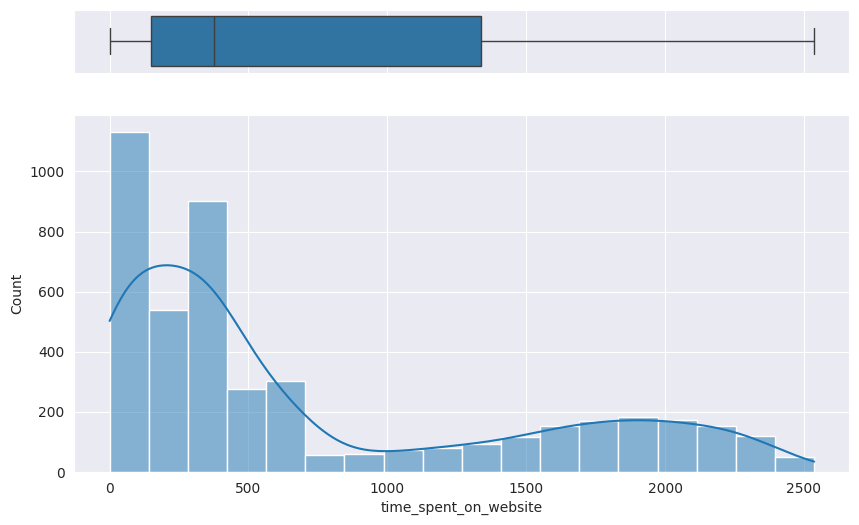

In [31]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.set_style("darkgrid")

# Add a graph in each part
sns.boxplot(data=data, x="time_spent_on_website", ax=ax_box)
sns.histplot(data=data, x="time_spent_on_website", kde=True, ax=ax_hist)
ax_box.set(xlabel='time_spent_on_website')

plt.show()

### **Observations:**



1.   The data shows 2 peaks: the major peak between 0-500 and the smaller peak between 1500-2500
2.   We can interpret that most leads dont go beyond 450+ seconds on the website



### **Page views per visit**

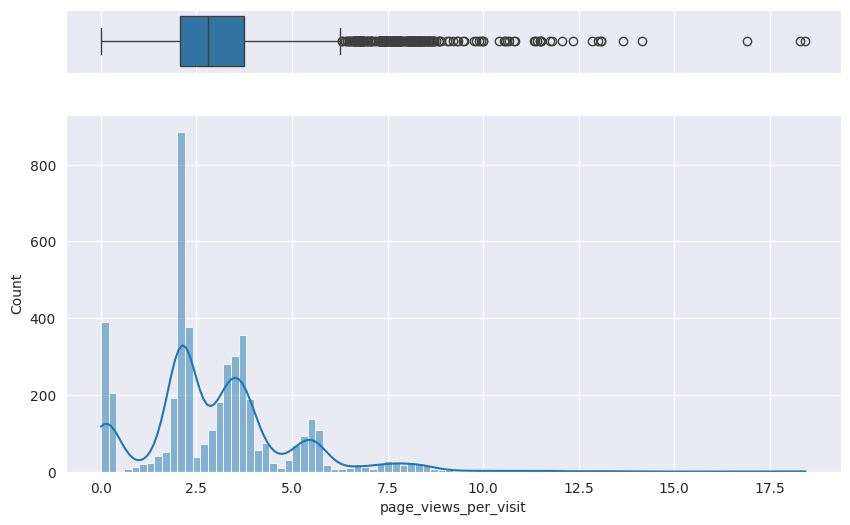

In [32]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15, .85)}, figsize=(10, 6))
sns.set_style("darkgrid")

# Add a graph in each part
sns.boxplot(data=data, x="page_views_per_visit", ax=ax_box)
sns.histplot(data=data, x="page_views_per_visit", kde=True, ax=ax_hist)
ax_box.set(xlabel='page_views_per_visit')

plt.show()

### **Observations:**



1.   We have a multi- modal distribution with signficant peaks at 0, 2, 3, 6 approximately
2.   there are a significant amount of outliers which validate that different leads will have different approaches to finding further information about a particular course.



## **Bivariate Analysis**

In [33]:
# Creating numerical columns
num_cols=['age','website_visits','time_spent_on_website','page_views_per_visit','print_media_type1','print_media_type2',
          'digital_media','educational_channels','referral','status']


<Axes: >

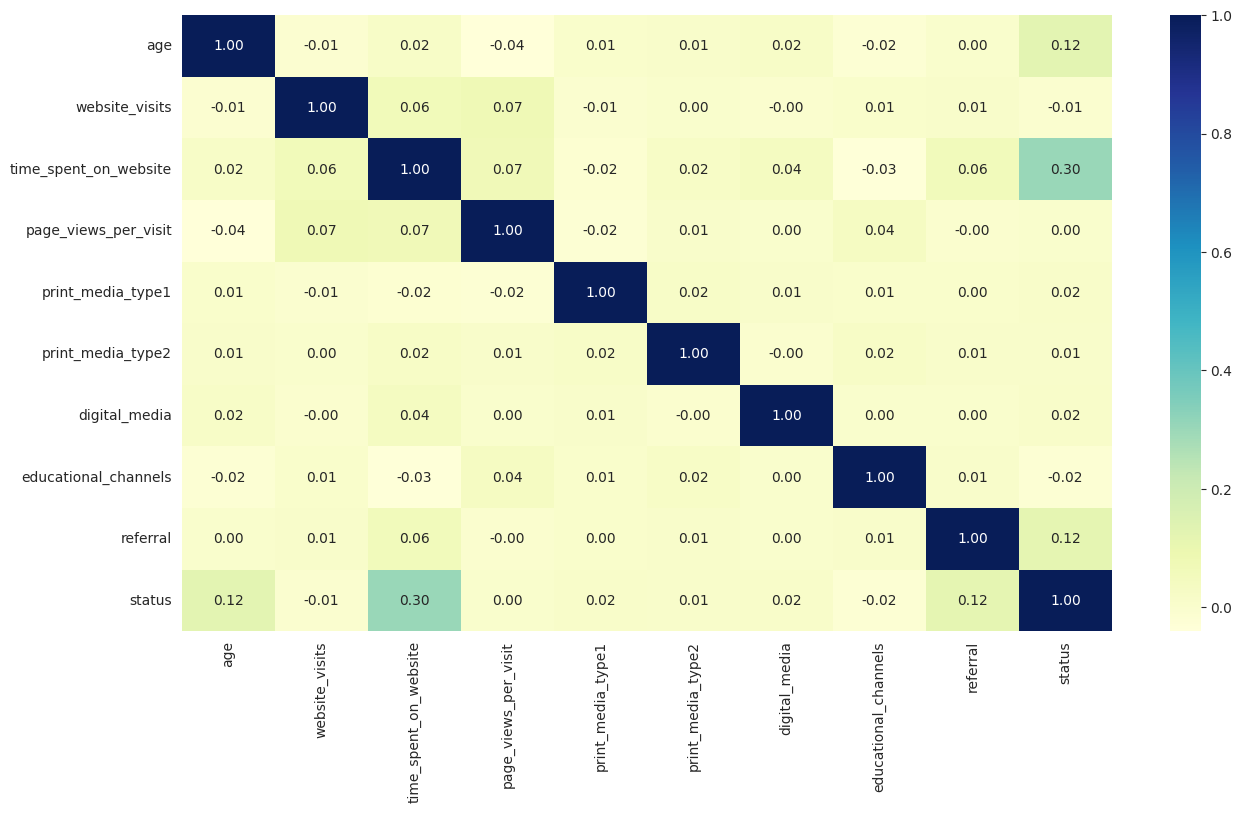

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(data[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

### **Observations:**


1.   Time spent on the website has byfar the strongest relation with a sucessful lead with age being the second most strongest variable.




### **Status vs age**

Text(0, 0.5, 'percentage conversion %')

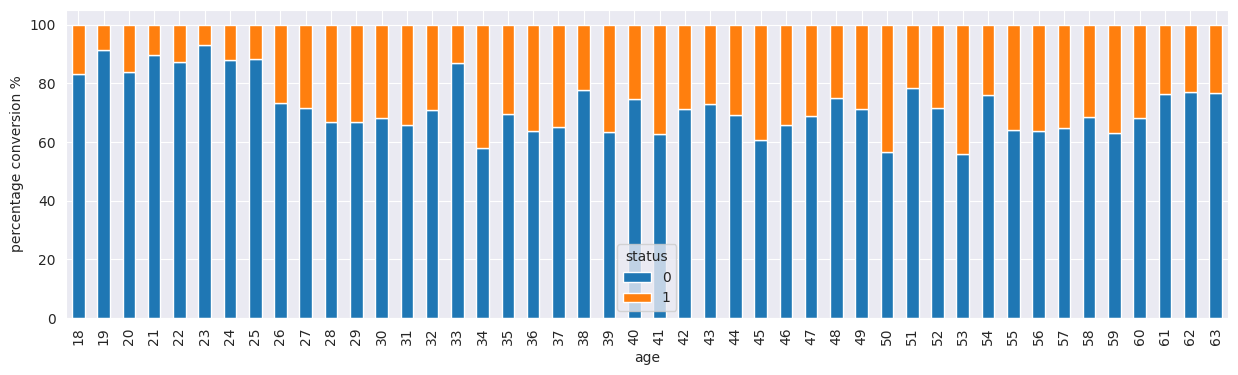

In [35]:
(pd.crosstab(data['age'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(15,4),stacked=True)
plt.ylabel('percentage conversion %')

### **Observations:**


1.   We see ages specifically 34, 50 and 53 have the highest conversion rate







### **Status vs Occupation**

Text(0, 0.5, 'percentage conversion %')

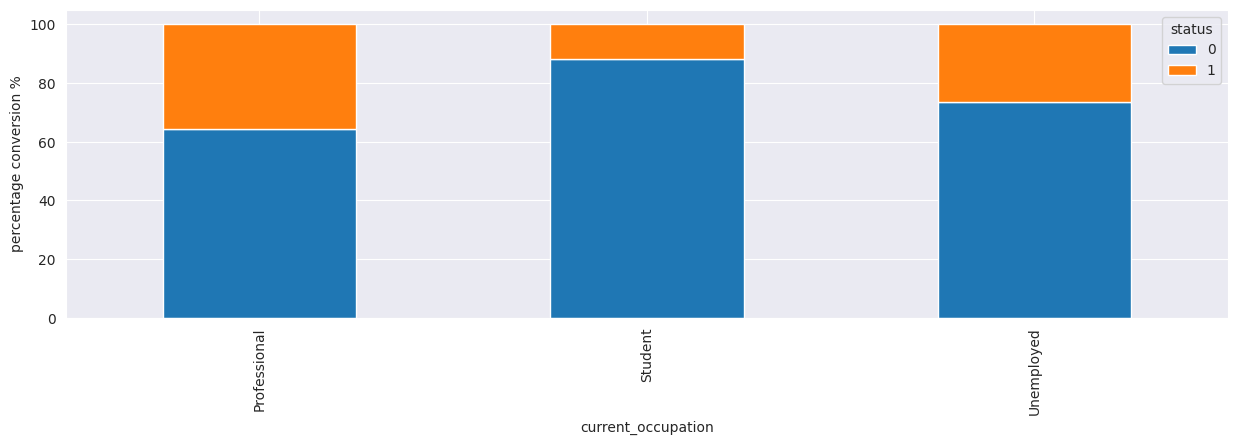

In [36]:
(pd.crosstab(data['current_occupation'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(15,4),stacked=True)
plt.ylabel('percentage conversion %')

### **Observations:**


1.   From the data we see that professional occupation has the highest amount of conversion.




### **Status vs First Interaction**

Text(0, 0.5, 'percentage conversion %')

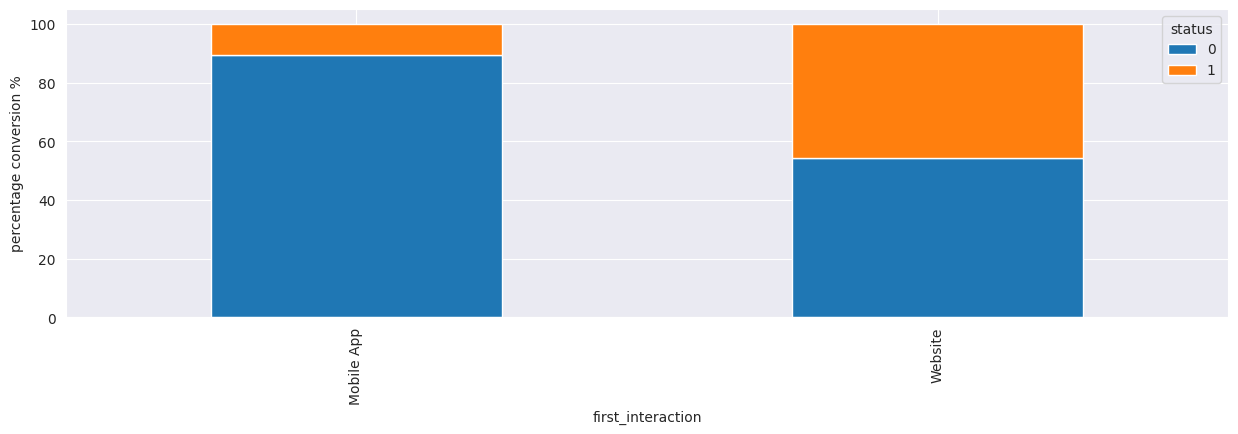

In [37]:
(pd.crosstab(data['first_interaction'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(15,4),stacked=True)
plt.ylabel('percentage conversion %')

### **Observations:**


1.   From the data we see that leads who had their first interaction on the website bring the most conversion.
2. Data shows that the company needs to work on their app to convince more leads to sign up
3. Or the company needs to revisit and see if their is some critical information missing on the app compared to website which is not building motivation for their leads.

### **Status vs Profile Completed**

Text(0, 0.5, 'percentage conversion %')

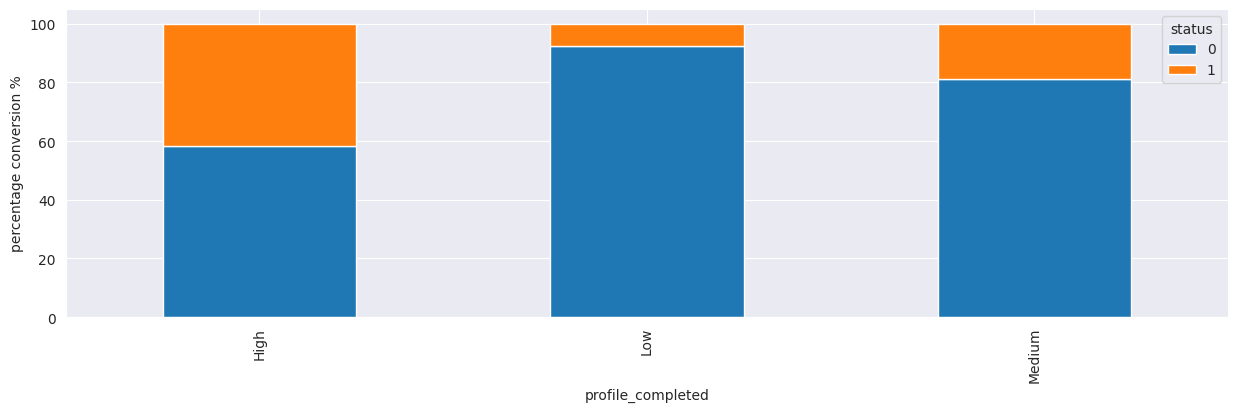

In [38]:
(pd.crosstab(data['profile_completed'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(15,4),stacked=True)
plt.ylabel('percentage conversion %')

### **Observations:**


1.   The leads who completed the most profile reflect their motivation to actually study the course.


### **Status vs website Visits**


Text(0, 0.5, 'percentage conversion %')

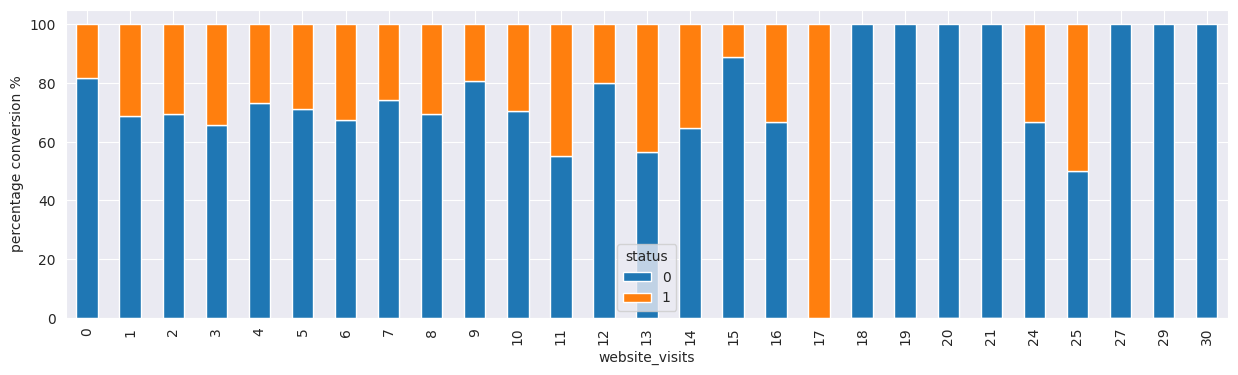

In [39]:
(pd.crosstab(data['website_visits'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(15,4),stacked=True)
plt.ylabel('percentage conversion %')

### **Observations:**


1.   Data suggests that 17 website visits is a strong indicator of a successful conversion , however we dont have any significant counts on 17 visits to even consider it a good prediction.


### **Status vs Last activity**


Text(0, 0.5, 'percentage conversion %')

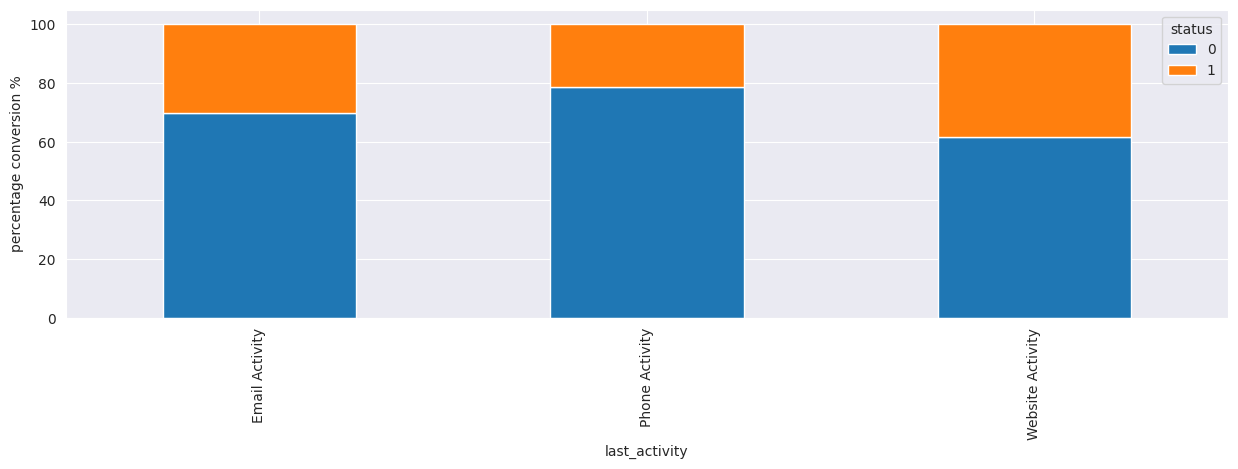

In [40]:
(pd.crosstab(data['last_activity'],data['status'],normalize='index')*100).plot(kind='bar',figsize=(15,4),stacked=True)
plt.ylabel('percentage conversion %')

### **Observations:**
1. Most leads who turn into successful leads come from website activity.  

## Building a Decision Tree model

### **Data preparation**

**Separating the independent variables (X) and the dependent variable (Y)**

In [41]:
data1 = data.copy()
X = data1.drop(["status"], axis=1)
y = data1["status"]

**Splitting the data into 70% train and 30% test set**


In [42]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [72]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 3228 entries, 389 to 2455
Series name: status
Non-Null Count  Dtype
--------------  -----
3228 non-null   int64
dtypes: int64(1)
memory usage: 50.4 KB


In [43]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

current_occupation
Professional    1844
Unemployed       996
Student          388
Name: count, dtype: int64
******************************
first_interaction
Website       1770
Mobile App    1458
Name: count, dtype: int64
******************************
profile_completed
High      1580
Medium    1570
Low         78
Name: count, dtype: int64
******************************
last_activity
Email Activity      1581
Phone Activity       837
Website Activity     810
Name: count, dtype: int64
******************************


In [44]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

current_occupation
Professional    772
Unemployed      445
Student         167
Name: count, dtype: int64
******************************
first_interaction
Website       772
Mobile App    612
Name: count, dtype: int64
******************************
profile_completed
High      684
Medium    671
Low        29
Name: count, dtype: int64
******************************
last_activity
Email Activity      697
Phone Activity      397
Website Activity    290
Name: count, dtype: int64
******************************


### **Encoding categorical variables**

In [45]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(3228, 16) (1384, 16)


In [46]:
X_train.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
389,57,1,582,2.197,0,0,0,1,0,False,False,False,False,False,False,False
1162,35,2,1937,5.111,0,0,1,0,0,False,True,True,False,True,False,False
1057,53,5,1554,2.123,0,0,0,1,0,False,True,True,False,True,False,False
436,52,7,15,4.382,0,0,0,0,0,False,False,True,False,False,False,False
946,57,0,0,0.000,1,0,0,0,0,False,False,True,False,False,False,False


**created a function to calculate and print the classification report and confusion matrix**

In [47]:
# Creating metric function

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Converted', 'Not Converted'], yticklabels=['Converted', 'Not Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Building the model with tree depth of 8 levels and check the scores**

In [48]:
# Building decision tree model

model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2264
           1       0.80      0.87      0.83       964

    accuracy                           0.90      3228
   macro avg       0.87      0.89      0.88      3228
weighted avg       0.90      0.90      0.90      3228



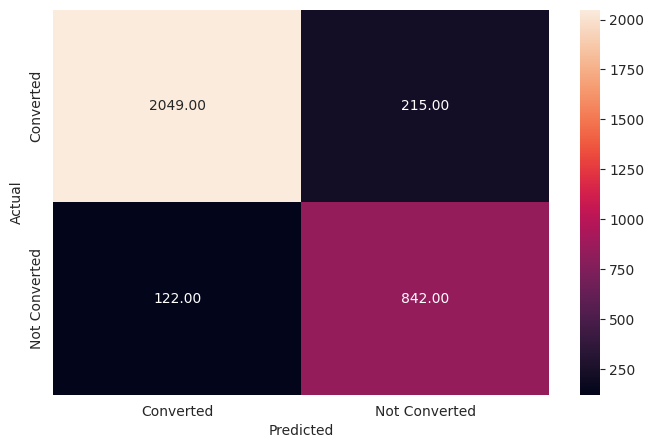

In [49]:
# Checking performance on the training dataset

pred_train_dt = model_dt.predict(X_train)

metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       971
           1       0.72      0.79      0.75       413

    accuracy                           0.85      1384
   macro avg       0.81      0.83      0.82      1384
weighted avg       0.85      0.85      0.85      1384



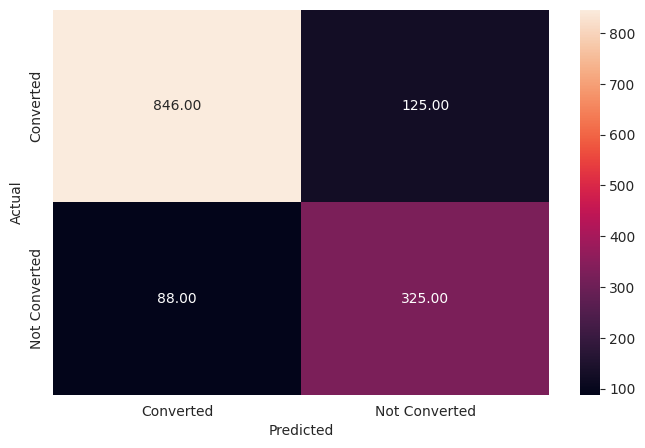

In [50]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

### **Observation**


1. The decision tree is slightly overfitting the trainning data.
2. Both **precision** and **recall** drops for the test data in score





**Building the model with tree depth of 7 levels and check the scores to see if model performs better**

In [51]:
# Building decision tree model

model_dt= DecisionTreeClassifier(random_state=1,max_depth=7)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2264
           1       0.81      0.80      0.81       964

    accuracy                           0.88      3228
   macro avg       0.86      0.86      0.86      3228
weighted avg       0.88      0.88      0.88      3228



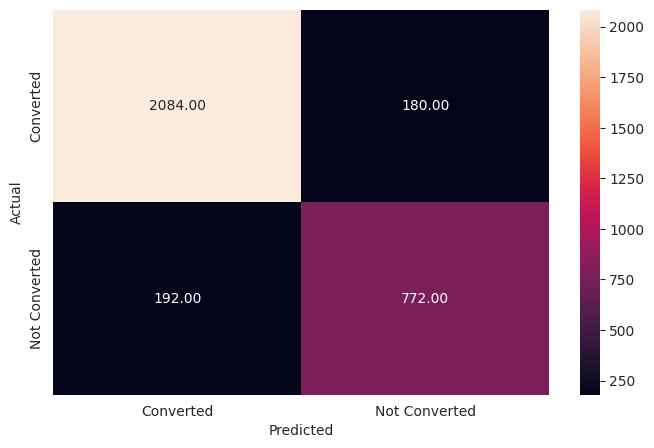

In [52]:
# Checking performance on the training dataset

pred_train_dt = model_dt.predict(X_train)

metrics_score(y_train, pred_train_dt)

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       971
           1       0.77      0.75      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



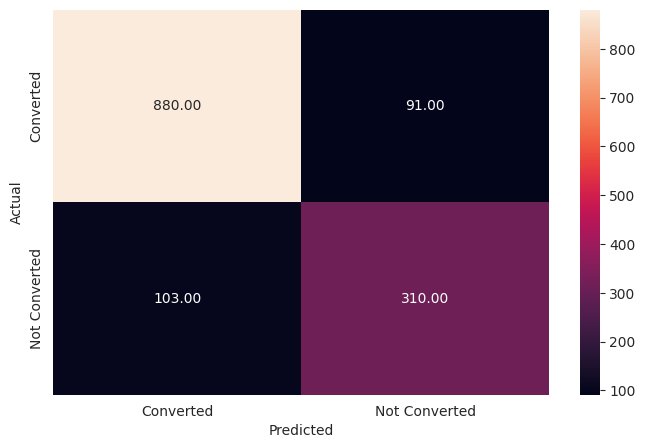

In [53]:
# Check performance on testing data set
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

The model slightly performs better with max depth as 7

**Let's plot the feature importance and check the most important features.**

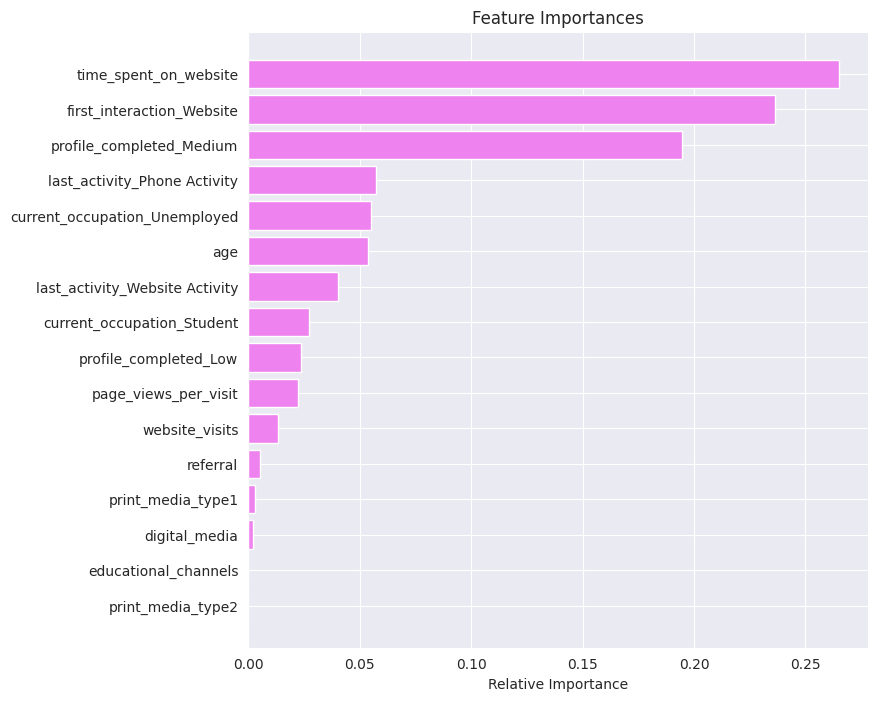

In [54]:
# Importance of features in the tree building

feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Let's visualize the decision tree**

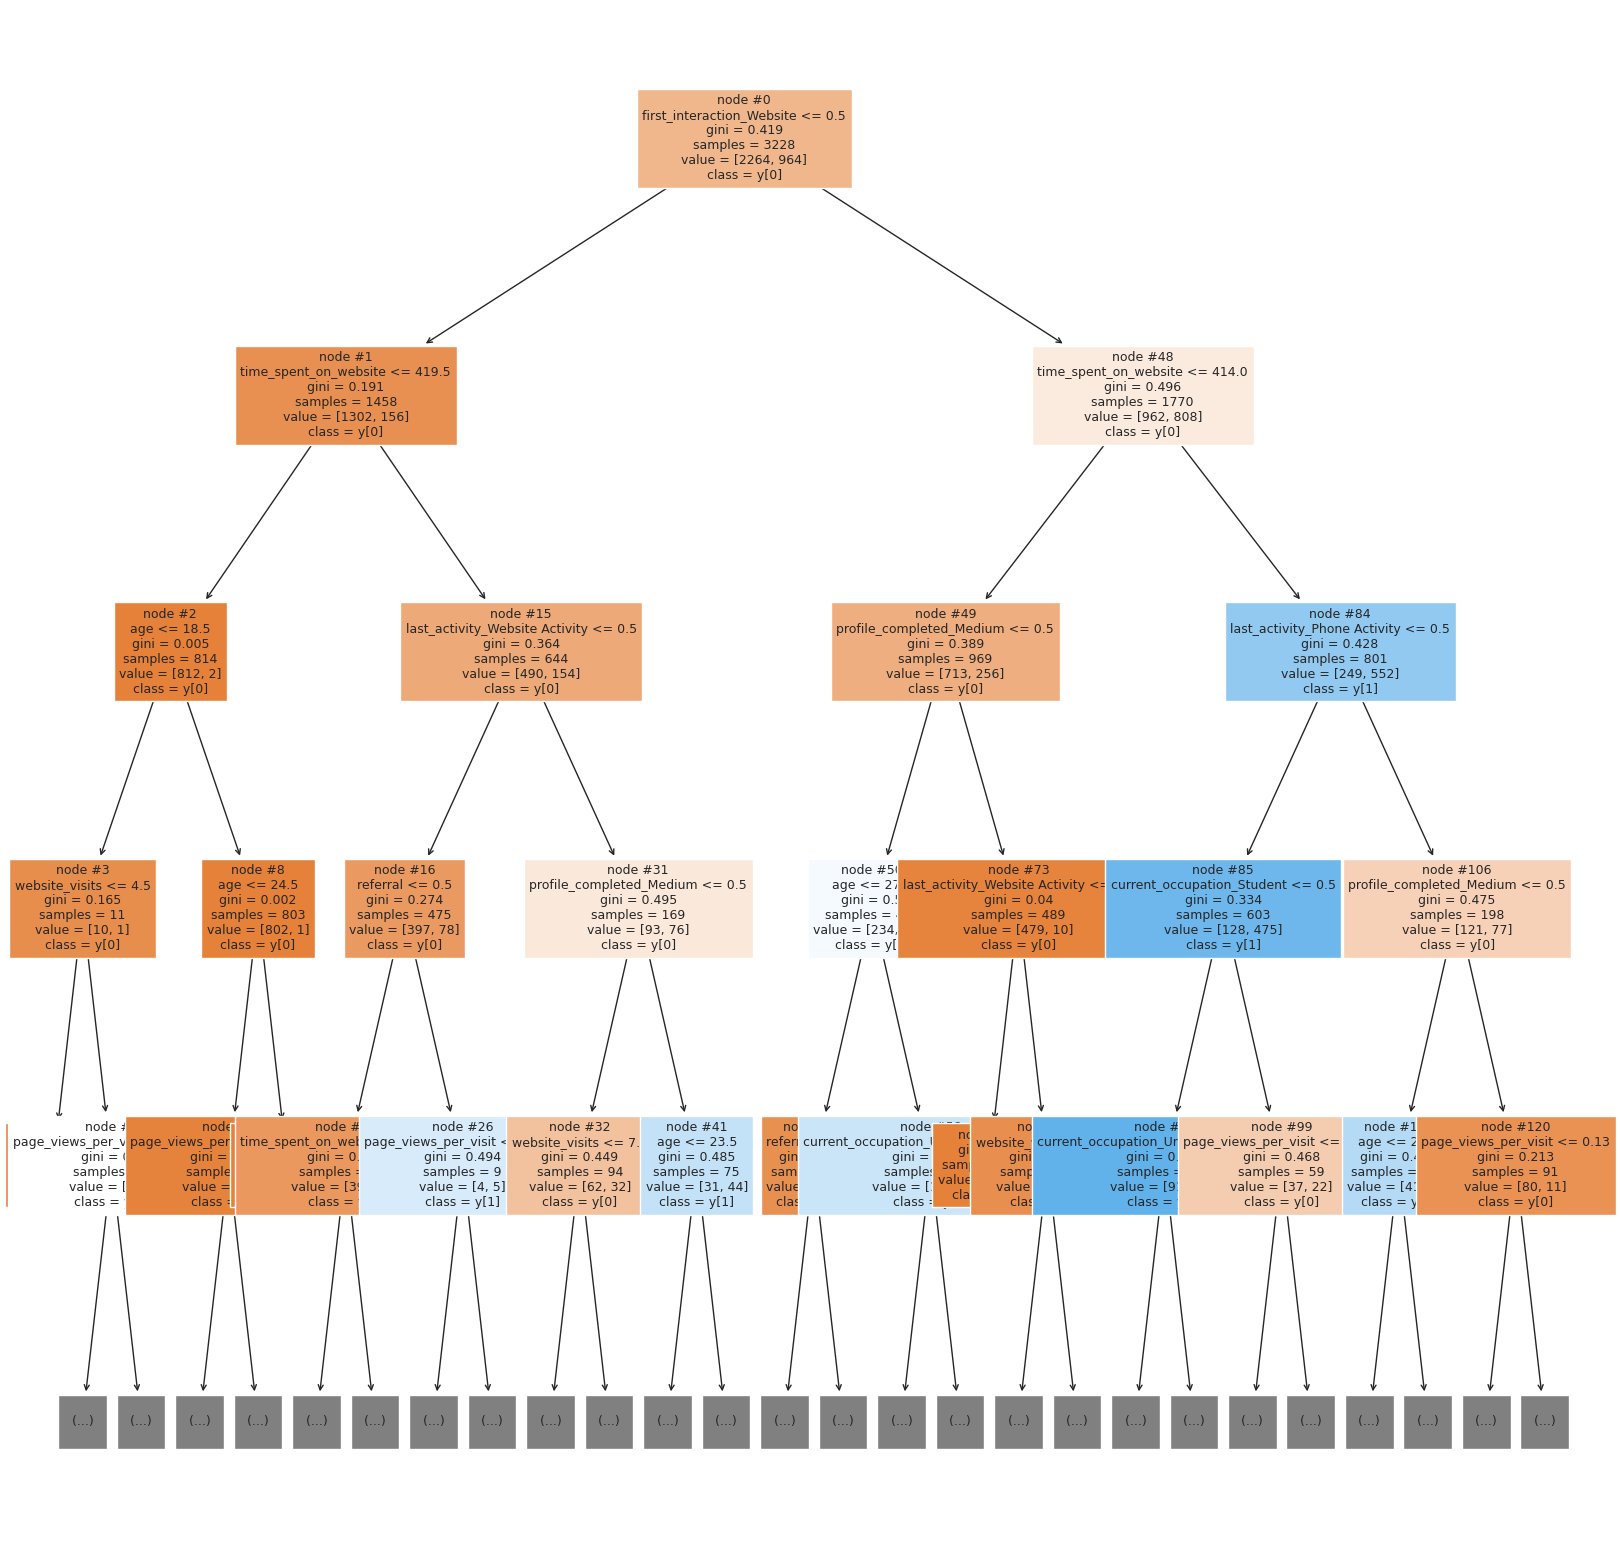

In [55]:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

From the decision tree we can that following features are the most significant:

1.   time spent on website
2.   first interaction on website
3. profile completed medium



## Do we need to prune the tree?

Pruning is generally advisable when model is overfitting for trainning data set. We have reduced overfitting by setting max depth to 7, however we can still perform hypertunning of parameters to see if model can benefit from even better results

In [56]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier( random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2264
           1       0.70      0.84      0.76       964

    accuracy                           0.85      3228
   macro avg       0.81      0.84      0.82      3228
weighted avg       0.86      0.85      0.85      3228



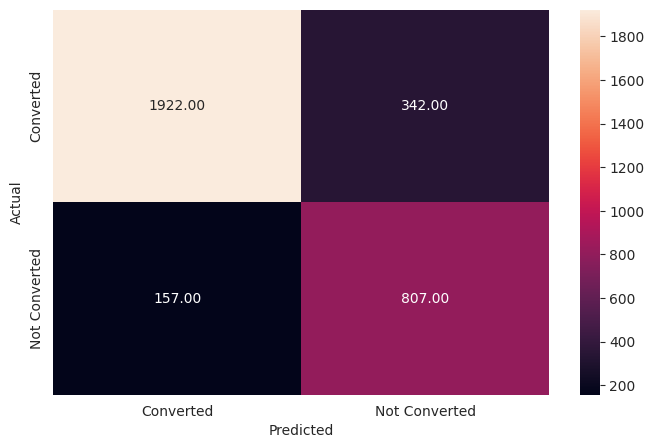

In [57]:
# Checking performance on the training dataset

pred_train_dt1 = dtree_estimator.predict(X_train)

metrics_score(y_train, pred_train_dt1)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       971
           1       0.68      0.82      0.74       413

    accuracy                           0.83      1384
   macro avg       0.80      0.83      0.81      1384
weighted avg       0.85      0.83      0.83      1384



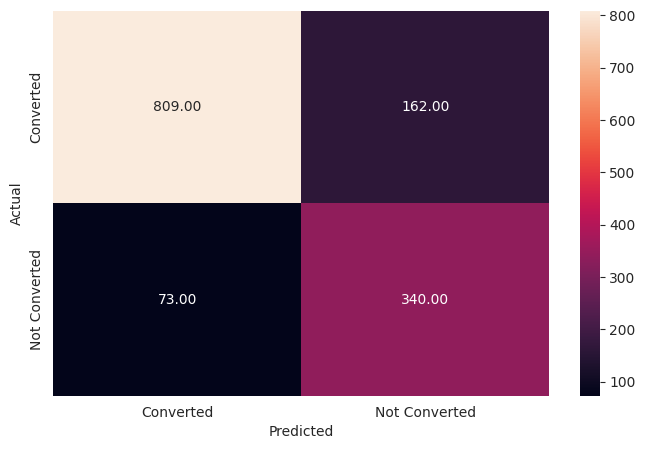

In [58]:
# Check performance on testing data set
pred_test_dt1 = dtree_estimator.predict(X_test)
metrics_score(y_test, pred_test_dt1)

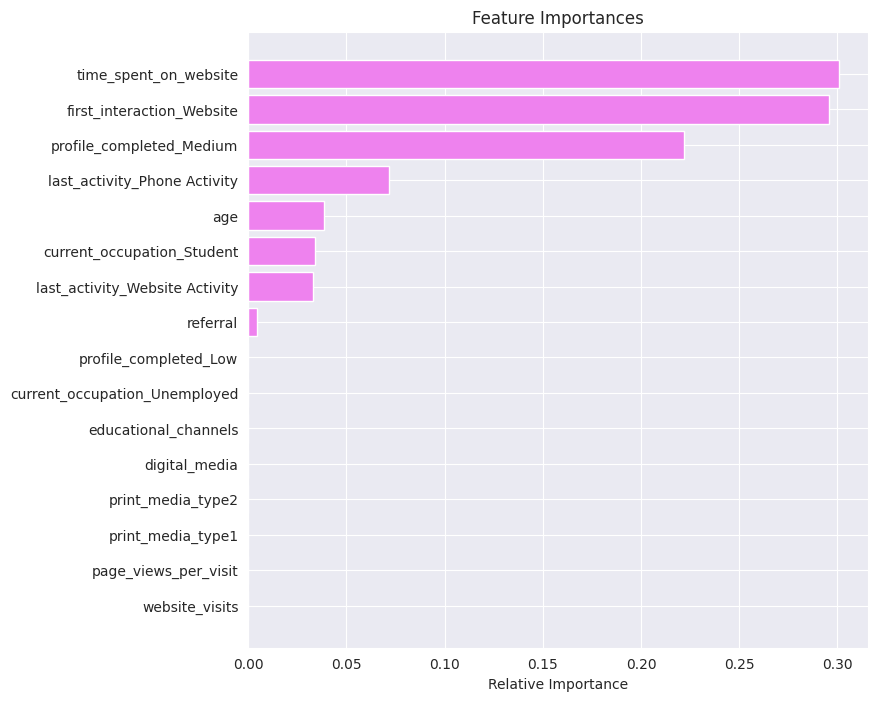

In [59]:
# Importance of features in the tree building

feature_names = list(X_train.columns)
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

From tuned parameters we see that the model has developed bias for certain features and ignores the importance of other features.The model precision also drops for the testing dataset. In this particular case , the model doesnt really benefit from pruning and the untuned model was giving the best results.

## Building a Random Forest model

In [60]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



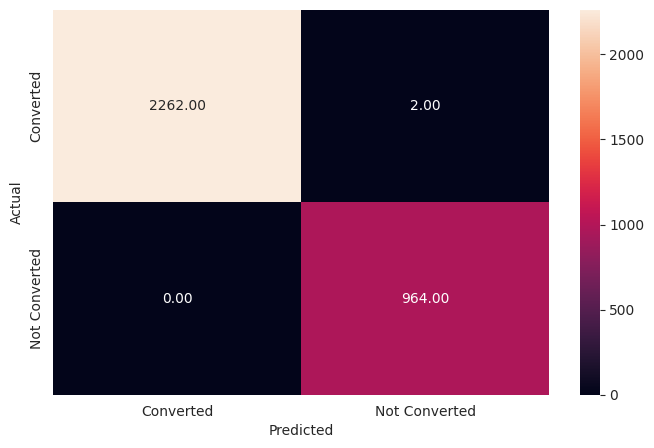

In [61]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**
- For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.79      0.74      0.77       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.84      1384
weighted avg       0.86      0.86      0.86      1384



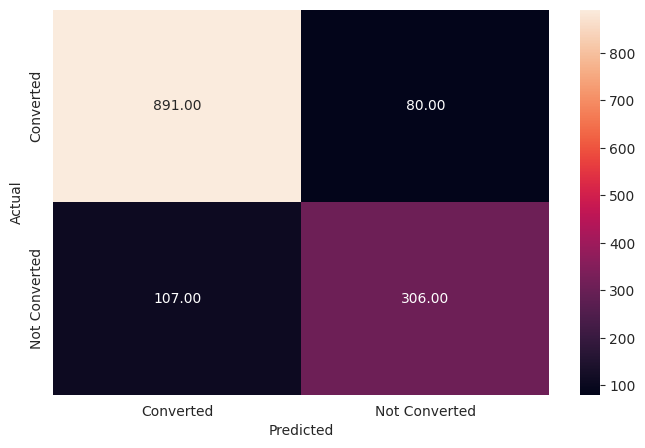

In [62]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only 74 .
- Precision is high for the test data as well.

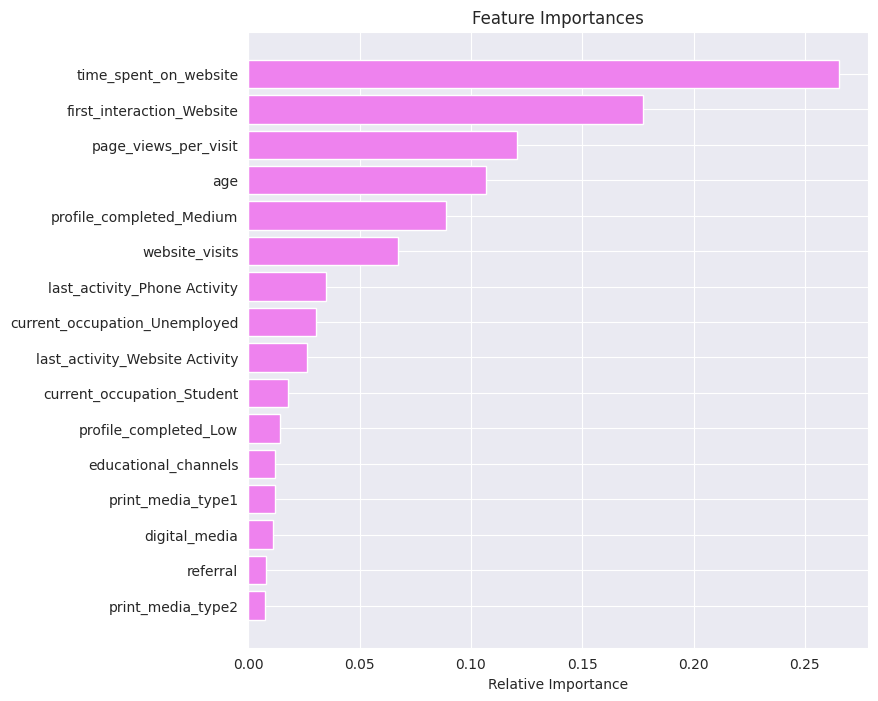

In [63]:
# Importance of features in the tree building

feature_names = list(X_train.columns)
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

From the decision tree we can that following features are the most significant:


1.   time spent on website
2.   first interaction website
3. page views per visit
4. age
5. profile completed medium


## Do we need to prune the tree?

In [64]:
# Choose the type of classifier
rforest_estimator = RandomForestClassifier( random_state = 1)

# Grid of parameters to choose from
params_rf = {
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rforest_estimator, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rforest_estimator = grid_obj.best_estimator_

KeyboardInterrupt: 

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rforest_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rforest_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
# Importance of features in the tree building

feature_names = list(X_train.columns)
importances = rforest_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The tuned model performs significantly better on trainning data set but the performance drops for test data set. In summary, the model doesnt need pruning and we can use the untuned model as the best model.

## Actionable Insights and Recommendations

Our predictive model can be deployed to

1.   Identify the leads that will surely apply for the course and turn into a paid customer
2.   Identify the percentage of leads we are not turning into paid customers and loosing as a buisness
3. Suggest what features need to be focused and worked on to avoid loosing potential customers

The data suggests that most of our buisness is driven when leads interact through website as first point of contact.

*   Which means either our website is very compelling with right amount of information compared to the app , so the company must invest in app improvement
*   Which also indicates if the company is currently investing in marketting for both its app and website, it should direct those funds to the website marketting untill the app is improved.

The data also suggest that most of the paid customers are Professionals, followed by unemployed and then comes students.

*   This indicates that the program and its content attracts people with professional bakcground, the company should also invest in programs that are more inclined to studnets
*   This also indicates the pricing of the program course which justifies from the stand point of an earning individual, so the pricing could be looked into or payment plans could be introduced so students can also afford to take these courses

The data suggest that when customers fill more than 50% of the profile there is a higher chance for conversion, which suggests that incentives can be introduced for customers when they complete their profile.


